## Import necessary modules

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()
import re

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Import cleaned file

In [4]:
laptop_data_clean = pd.read_csv('./laptop_data_clean.csv', encoding='latin-1')
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


## Visualisation of data

In [6]:
print("Data type : ", type(laptop_data_clean))
print("Data dims : ", laptop_data_clean.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1303, 12)


In [9]:
laptop_data_clean.describe()

,Inches,Ram,Weight,Price_sgd
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1764.188411
std,1.426304,5.084665,0.665475,1097.444257
min,10.100000,2.000000,0.690000,273.180000
25%,14.000000,4.000000,1.500000,940.430000
50%,15.600000,8.000000,2.040000,1533.890000
75%,15.600000,8.000000,2.300000,2335.970000
max,18.400000,64.000000,4.700000,9575.430000


### Numerical Distribution

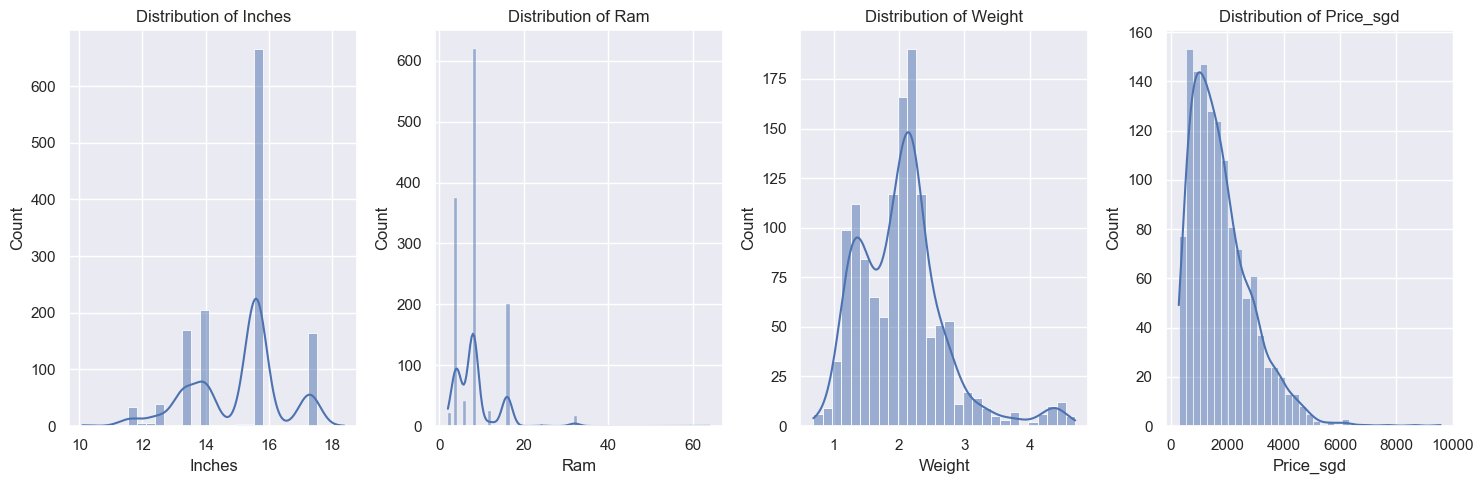

In [16]:
numerical_columns = laptop_data_clean.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plotting the distribution for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sb.histplot(data=laptop_data_clean, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

### Categorical distribution

In [17]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

def plot_box(x, y, subtitle, color, order=None):
    plt.figure(figsize=(25, 10)) 
    ax = sb.boxplot(data = laptop_data_clean, y = y, x = x, order = order,
                 linewidth = 0.8, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 2.5, linestyle = 'none',  alpha = 0.9))


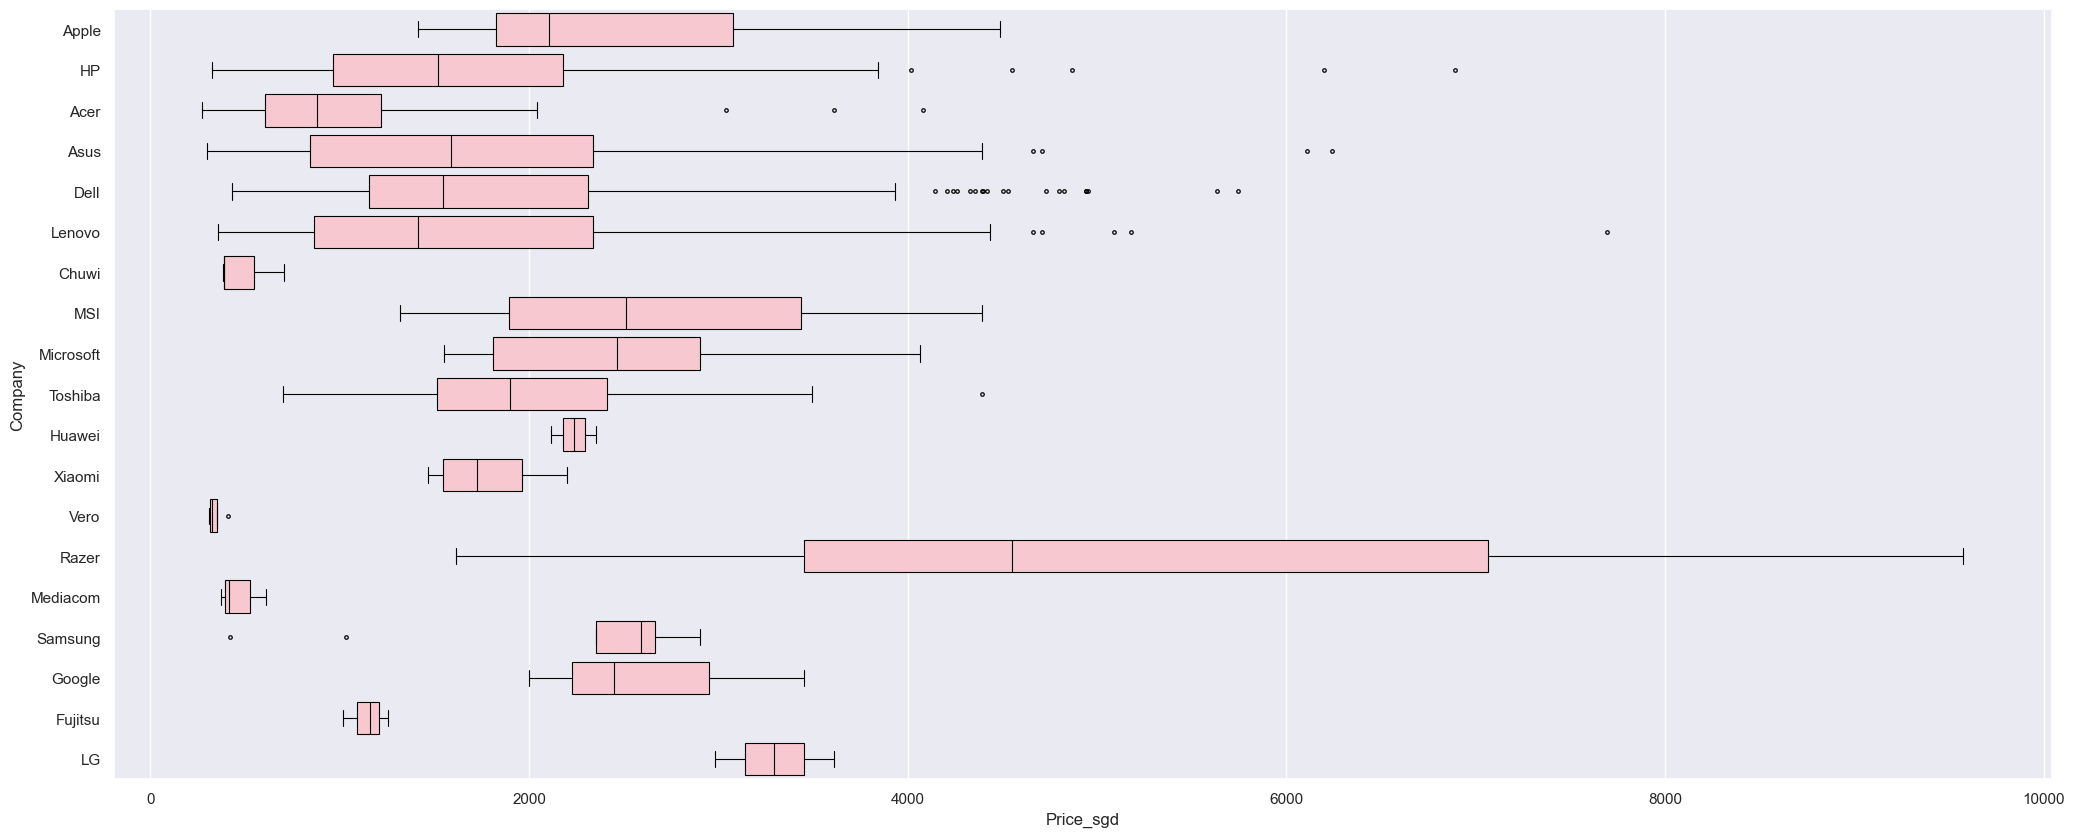

In [18]:
plot_box(x = "Price_sgd", y = "Company",
         subtitle = "Distributions, boxplots", color = "pink")

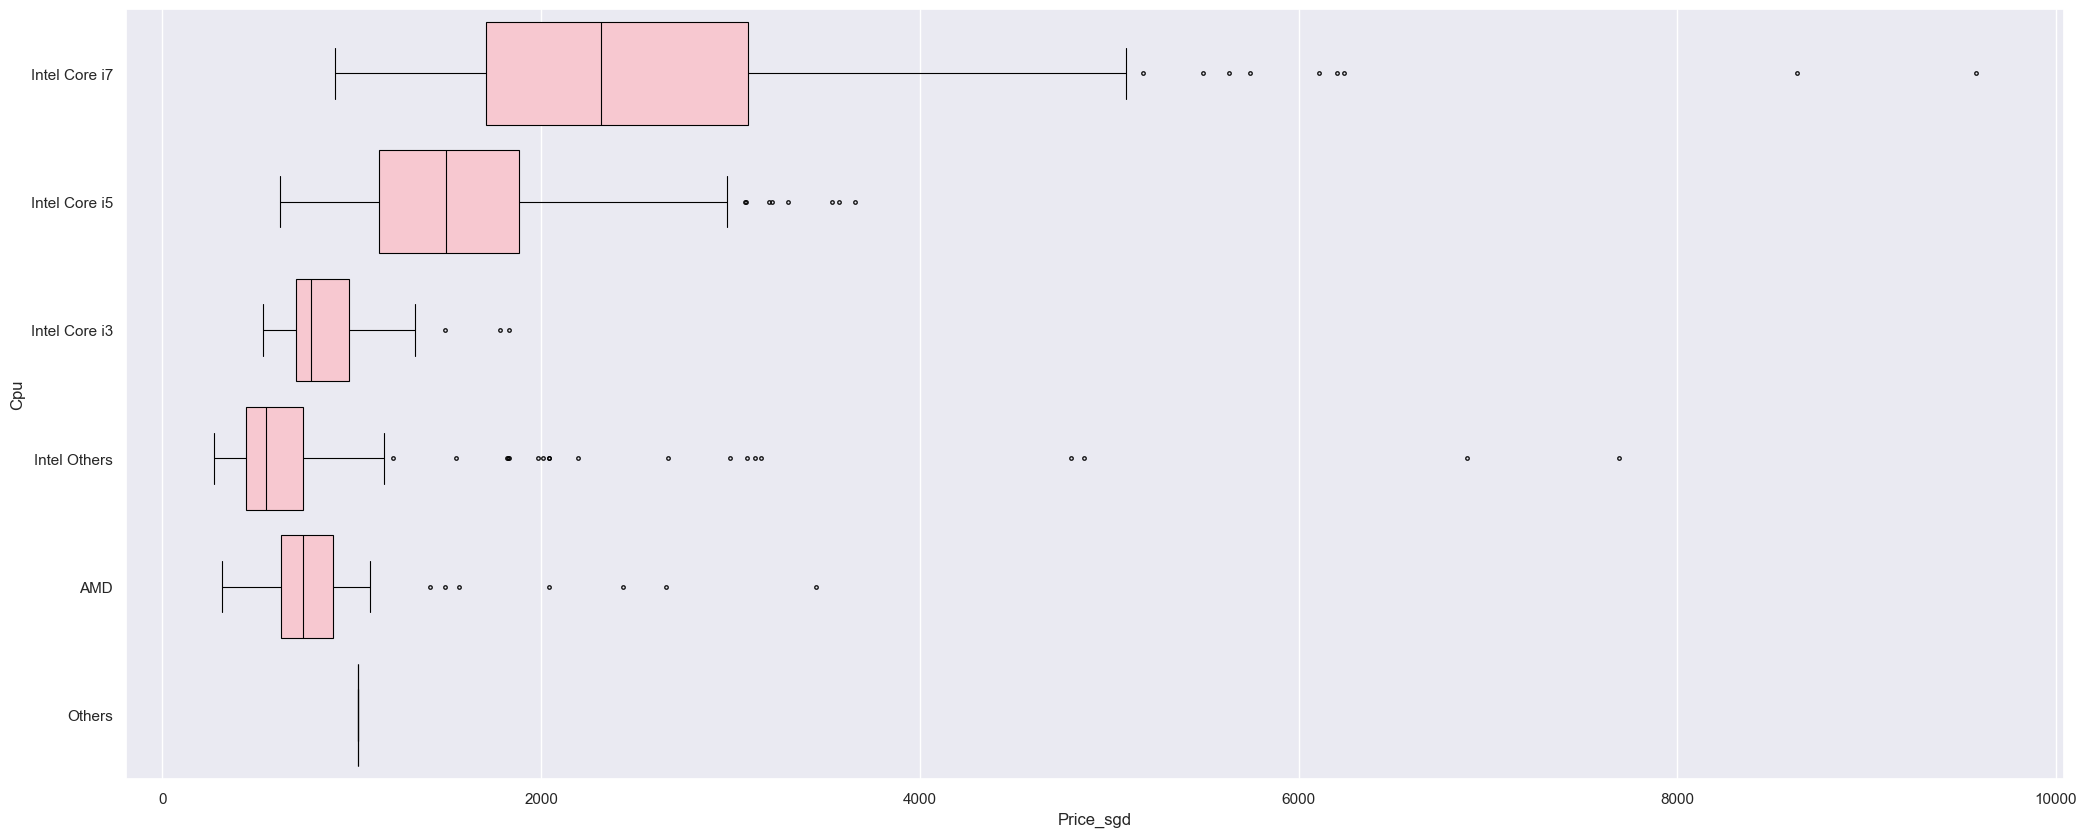

In [19]:
plot_box(x = "Price_sgd", y = "Cpu", 
         subtitle = "Distributions, boxplots", color = "pink",
         order = ["Intel Core i7", "Intel Core i5", "Intel Core i3", "Intel Others", "AMD", "Others"])

## Correlation matrix

In [ ]:
## from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laptop_data_clean['Company'] = le.fit_transform(laptop_data_clean['Company'])
laptop_data_clean['Product'] = le.fit_transform(laptop_data_clean['Product'])
laptop_data_clean['TypeName'] = le.fit_transform(laptop_data_clean['TypeName'])
# laptop_data_clean['Inches'] = le.fit_transform(laptop_data_clean['Inches'])
laptop_data_clean['ScreenResolution'] = le.fit_transform(laptop_data_clean['ScreenResolution'])
# laptop_data_clean['Ram'] = le.fit_transform(laptop_data_clean['Ram'])
laptop_data_clean['Memory'] = le.fit_transform(laptop_data_clean['Memory'])
laptop_data_clean['Cpu'] = le.fit_transform(laptop_data_clean['Cpu'])
laptop_data_clean['Gpu'] = le.fit_transform(laptop_data_clean['Gpu'])
laptop_data_clean['OpSys'] = le.fit_transform(laptop_data_clean['OpSys'])
# laptop_data_clean['Weight'] = le.fit_transform(laptop_data_clean['Weight'])
# laptop_data_clean['Price_euros'] = le.fit_transform(laptop_data_clean['Price_euros'])
laptop_data_clean